<center>Заметка 14. Гипотезы и распределения.</center>
<center>курса <q>Математический практикум по Питону</q>.</center>
<center>Шокуров Антон В.</center>
<center>shokurov.anton.v@yandex.ru</center>
<center>http://машинноезрение.рф</center>
<center>Версия 0.11</center>

<center>Аннотация</center>
<p>
Построение гипотез, проверка на нормальность и принадлежность распределению.
</p>

<p>Это предварительная версия! Любые замечания приветсвуются.</p>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as models

<h2>Измерение соотношения количеств</h2>

<b>Используем распределение Бернули</b>

Задается вероятностью p происхождения события. Например, вероятность кликнуть на банер, зайти на сайт, прийти в магазин или купить товар. Это все разные вероятности. Важное, что некое событие может произойти и неоднократно.

In [2]:
models.bernoulli.rvs( 0.7, 10) # Так нельзя, так как 10 будет использоватся как сдвиг.

11

В питоне функции могут использовать два типа аргументов или иначе параметров, которые ей передаются. Первый тип позиционый, который является стандартным для большинства языков программиования. Суть в том, что параметры присваиваются в порядке и задания при вызове. А бывают аргументы именные, которые можно присвоить вне очереди.

Рассмотреть документацию по данной функции
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html

Конкретно изучим описание функции rvs:
rvs(p, loc=0, size=1, random_state=None)

Последнее к сожалению позволит понять какие значения были присвоены аргументам по умолчанию.
часть аргументов просто перечислена (а данном случае только p), а часть через знак '='.

In [3]:
# Вообще у любого объекта, функции по соглашению может быть поле __doc__ которое дает краткую документацию по нему.
# Так как это поле является строчкой, то для аккуратного вывода лучше применить функцию print
# Подробнее о ней будет позже. Сейчас она используется для вывода самоописания функции.
print( models.bernoulli.rvs.__doc__ )


        Random variates of given type.

        Parameters
        ----------
        arg1, arg2, arg3,... : array_like
            The shape parameter(s) for the distribution (see docstring of the
            instance object for more information).
        loc : array_like, optional
            Location parameter (default=0).
        size : int or tuple of ints, optional
            Defining number of random variates (Default is 1).  Note that `size`
            has to be given as keyword, not as positional argument.
        random_state : None or int or ``np.random.RandomState`` instance, optional
            If int or RandomState, use it for drawing the random variates.
            If None, rely on ``self.random_state``.
            Default is None.

        Returns
        -------
        rvs : ndarray or scalar
            Random variates of given `size`.

        


Из данного описания следует, что сначала идут позиционные параметры (arg1, arg2, ...), а потом именные (loc, size, random_state). Тем не менее, если они идут подряд, то присвоение идет подряд.

In [4]:
# В данном случае:
models.bernoulli.rvs( 0.7, 10) # 0.7 это параметр распределения, а 10 присвоилось аргументу loc.

10

In [5]:
models.bernoulli.rvs( 0.7, 10, 5) # Вот теперь очередь дошла до размера, которому было присвоено значение 5.

array([10, 11, 11, 11, 11])

In [6]:
# Но можно было бы и явно присвоить переменной отвечащей за размер размер:
models.bernoulli.rvs( 0.7, size = 10 ) # Аргументу size присвоено значение вне очереди.

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 0])

In [7]:
# Нельзя позиционный аргумент подавать после именных. Последнее выдаст соответствующую ошибку:
models.bernoulli.rvs( size = 10, 0.7 )

SyntaxError: positional argument follows keyword argument (<ipython-input-7-5776a8475623>, line 2)

In [8]:
# Но если аргументы заданы по имени, то их можно подавать функции в произвольном порядке.
models.bernoulli.rvs( size = 10, p = 0.7 )

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 1])

In [9]:
# В данном случае было задано и значение параметра loc, положения.
models.bernoulli.rvs( size = 10, p = 0.7, loc = 5 )

array([5, 6, 6, 6, 6, 5, 5, 6, 6, 6])

<b>Закон больших чисел</b>

Нам нужно взять среднее количество произошедших событий. Точнее понять как это среднее рапределено. Теория говрит, что оно должно стремится к нормальному распределению.

In [10]:
# Имитация закона больших чисел:
data = [] # Содали пустой список
for i in range( 1000 ): # Мы явно указали размер нешей выборки
    lap = models.bernoulli.rvs( 0.7, size=100 ) # а также количество элементов в устреднение.
    data.append( np.sum( lap )/100 )

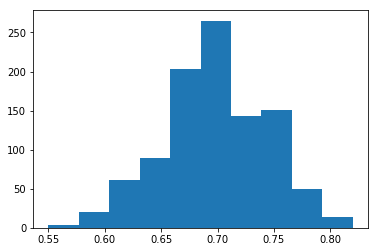

In [11]:
plt.hist( data );

In [12]:
# Хотим цикл ещё раз запустить с другим количеством эллементов в сумме.

<b>Продолжаем с Бернули</b>

In [13]:
# Вводим понятие функции, т.е. сами пишем.
def buildBernSum( p, cycles = 1000, elems = 100 ): # Два аргумента. Оба необязательны. Имеют значение по умолчанию.
    data = [] # Содали пустой список
    for i in range( cycles ):
        lap = models.bernoulli.rvs( p, size=elems ) # 0.7
        data.append( np.sum( lap )/elems )
    return data # Вернули результат.

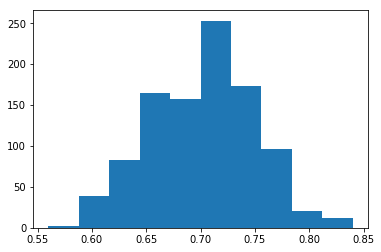

In [14]:
bern = buildBernSum( 0.7 )
plt.hist( bern );

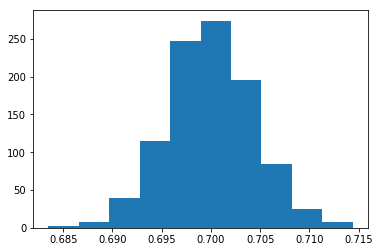

In [15]:
bern = buildBernSum( 0.7, elems = 10000 )
plt.hist( bern );

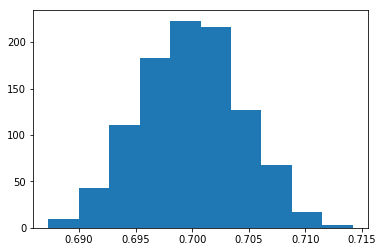

In [16]:
bern = buildBernSum( elems = 10000, p = 0.7)
plt.hist( bern );

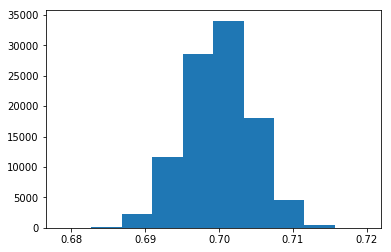

In [17]:
bern = buildBernSum( 0.7, 100000, 10000 ) # Позиционное присвоение параметров
plt.hist( bern );

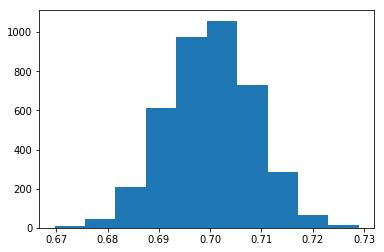

In [18]:
bern = buildBernSum( 0.7, 4000, 3000 )
plt.hist( bern );

<h3>Проверка того, что распределение Нормально</h3>

In [19]:
#С увеличением параметров распределение будет стремится к нормальному

<b>Статистика Шапиро-Уилка</b>

In [20]:
np.random.seed( 2018 ) # Инициализация генератора случайных чисел.

(0.964828372001648, 0.8391991853713989)

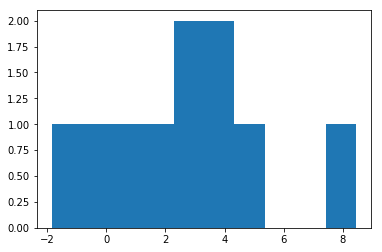

In [21]:
dat = models.norm.rvs( 2, 3, size=10 ) # 2 и 3 это параметры нормального распределения.
plt.hist( dat );
t = models.shapiro( dat ) # Шапиро-Уилка тест для нормальности. Предполагается, что данных не очень много ( < 5000).
t

In [22]:
# t[0] -- Это значение самой статистики.
# t[1] -- Это значение p-value
print( "Статистика -- ", t[0], ", p-значение ", t[1])

Статистика --  0.964828372001648 , p-значение  0.8391991853713989


Смотрим на p-значение. Если оно больше, например, 5%, то говорим,
что с такой значимостью не можем отвергнуть гипотезу о нормальности даных.

(0.6501786112785339, 0.00022055456065572798)

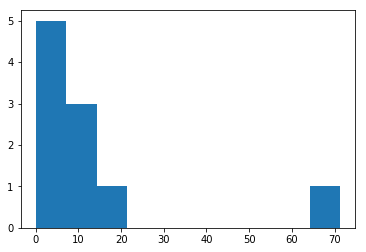

In [23]:
plt.hist( dat * dat ); # Строим гистограмму для квадратов нормального распределения. Для данного распределения
models.shapiro( dat * dat ) # p-значение очень маленькое. Поэтому гипотезна о нормальности отвергнута. 

(0.42994236946105957, 5.541986638490926e-07)

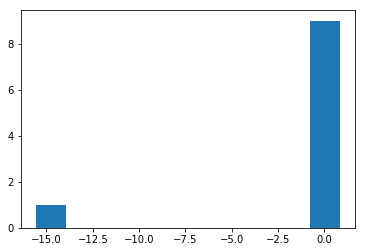

In [24]:
plt.hist( 1/dat ); # Строим гистограмму для обратной величины от нормального распределения.
models.shapiro( 1/dat ) # Она тем более не являются нормальными. p-значение ну очень маленькое.

In [25]:
dat = models.norm.rvs( 2, 3, 10 ) # Возьмем новый набор данных.

(0.8227037787437439, 0.027322569862008095)

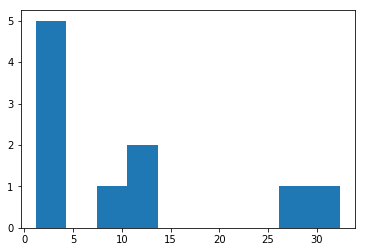

In [26]:
plt.hist( dat * dat );
models.shapiro( dat * dat ) # p-значение чуть повыше, но все-равно меньше традиционной значимости 0.05.

(0.9199906587600708, 0.3568774163722992)

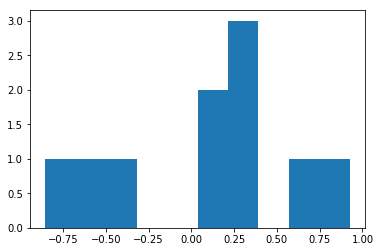

In [27]:
plt.hist( 1/dat ); # При молой выборке конечно возможны ложные результаты
models.shapiro( 1/dat ) # Действительно смахивает на нормальное распределение. p-значение значительно выше 5%.

In [28]:
dat = models.norm.rvs( 2, 3, 100 ) # Если взять больше данных, то вероятность такого мала.

(0.977222204208374, 0.08058711141347885)

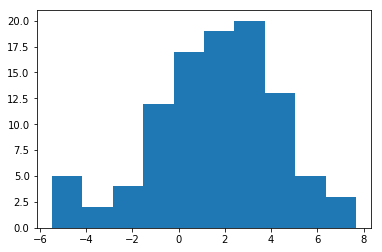

In [29]:
plt.hist( dat  ); # С увеличением данных, статестический тест может давать странные результаты.
models.shapiro( dat ) # В данном случае хоть тест и пройден, все-таки 8% не сильно далеко от 5%.

(0.7918012142181396, 1.3974837953512065e-10)

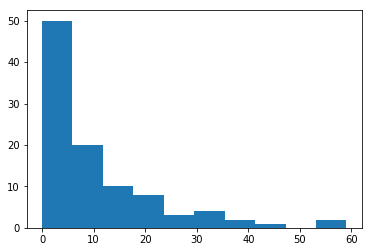

In [30]:
plt.hist( dat * dat ); # Для произведения нормальных распределений.
models.shapiro( dat * dat ) # p-значение совсем маленькое. Поэтому, тест не пройден.

(0.16183680295944214, 2.745975081282877e-21)

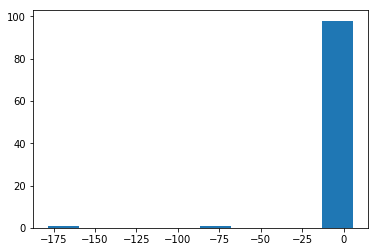

In [31]:
plt.hist( 1/dat ); # При большой выборке вероятность ложного результата для сильных отклонений от нормального мала.
models.shapiro( 1/dat ) # p-значение совсем маленькое. Поэтому, тест не пройден.

(0.8418232798576355, 0.046399232000112534)

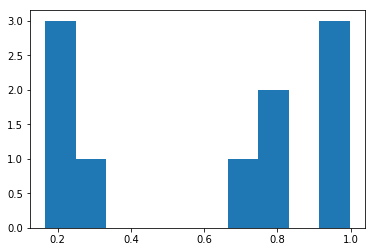

In [32]:
dat = models.uniform.rvs( size = 10 ) # Возьмем проcто-напросто другой тип раcпределения, а именно равномерное.
plt.hist( dat  );
models.shapiro( dat ) # Тем не менее тест ломается на равномерном распределении, так как p-значение пройдено.

(0.95497065782547, 0.001789760310202837)

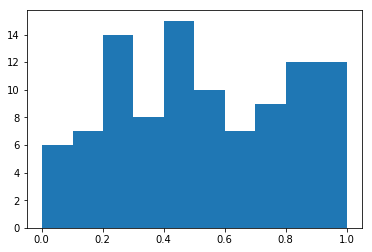

In [33]:
dat = models.uniform.rvs( size = 100 ) # Теперь увеличим объем выборки для равномерного распределения.
plt.hist( dat  ); 
models.shapiro( dat ) # p-значение не пройдено, поэтому гипотезу отвергаем.

(0.6480447053909302, 3.8774498477452124e-14)

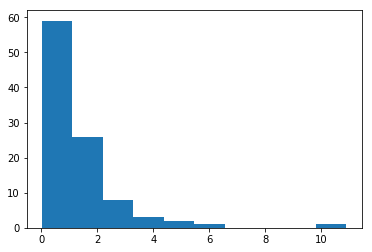

In [34]:
dat = models.f.rvs( 5, 7, size = 100 ) # f распределение с параметрами 5 и 7.
plt.hist( dat  );
models.shapiro( dat ) # f распределении отвергаем, так как p-значение существенно меньше.

(0.8836591243743896, 2.600836523924954e-07)

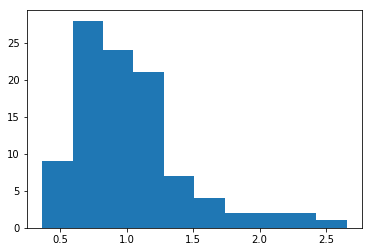

In [35]:
dat = models.f.rvs( 20, 35, size = 100 ) # f распределение с параметрами 20 и 35.
plt.hist( dat  );
models.shapiro( dat ) # Для данных параметров оно тоже отвергнуто.

(0.9983240962028503, 0.4454226791858673)

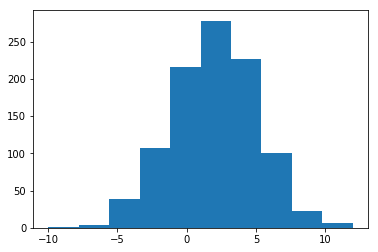

In [36]:
dat = models.norm.rvs( 2, 3, 1000 ) 
plt.hist( dat  ); 
models.shapiro( dat ) # Все хорошо с p-значением.

<b>Anderson-Darling</b>

Предыдущая статистика работает только для нормального распределения. Для данного же теста можно задать используемое распределение: norm, expon, logistic, gumbel, gumbel_l, gumbel_r, extreme1.
Пока будем оставатся в рамках нормального.

В Шапиро-Уилка граница была единственной. Той что обычно принято пользоваться.
В методе же Андерсона таких границ считается несколько для различных уровней значимости.

AndersonResult(statistic=1.7489833322056967, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

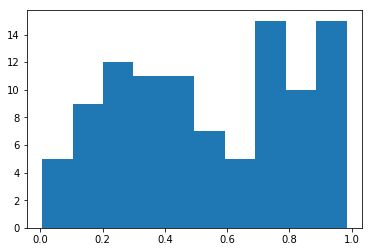

In [37]:
dat = models.uniform.rvs( size = 100 ) # Пвторно проверим на равномером распределении.
plt.hist( dat  );
models.anderson( dat, dist='norm' ) # Тест отвергает данные как принадлежащие равномерному распределению.
# Статистику нужно возвести в квадрат и сравнить с критерием. Если больше, то гипотеза отвергается.

<h3>Проверка того что распределение то что нужно.</h3>

In [38]:
dat = models.norm.rvs( 2, 3, 100 ) # Для начала прверим для нормального распределения.
res = models.anderson( dat )

In [39]:
res

AndersonResult(statistic=0.5202850618377823, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [40]:
res[1] # Значение значимости критических уровней.

array([0.555, 0.632, 0.759, 0.885, 1.053])

In [41]:
res[2] # Сами уровни.

array([15. , 10. ,  5. ,  2.5,  1. ])

In [42]:
# Можно представить их матрицей.
table = np.array([res[1], res[2]])
table

array([[ 0.555,  0.632,  0.759,  0.885,  1.053],
       [15.   , 10.   ,  5.   ,  2.5  ,  1.   ]])

In [43]:
# В res[0] у нас значение статистики.
res[0] # Для проверки гипотезы нужно сравнить это число с критическими значениями.

0.5202850618377823

<b>Бернули</b>

In [44]:
bern = buildBernSum( 0.7, 4000, 3000 )
res = models.anderson( bern ) # Второй параметр указывает на распределение. Поумолчанию проверка на нормальность.
res # Дествительно стремимся к нормальному распределению.

AndersonResult(statistic=0.5746405409158797, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [45]:
params = models.norm.fit( bern )
params

(0.7002819166666667, 0.008402724141197046)

In [46]:
models.norm.interval( 0.95, params[0], params[1] )

(0.6838128799778953, 0.7167509533554381)

In [47]:
models.bernoulli.interval( 0.7, 0.7 ) # Системе плохо.

(0.0, 1.0)

In [48]:
models.norm.interval( 0.95 )

(-1.959963984540054, 1.959963984540054)

In [49]:
pp = np.mean( bern )
pp

0.7002819166666667

In [50]:
dd = np.sqrt(pp*(1-pp)/3000)
dd

0.008364352014279137

In [51]:
lim = models.norm.interval( 0.95, 0, 1 )
lim

(-1.959963984540054, 1.959963984540054)

In [52]:
pp + dd*lim[0], pp + dd*lim[1]

(0.6838880879646646, 0.7166757453686688)

In [53]:
models.laplace.rvs()

0.07879868627460583